In [17]:
import pandas as pd

df = pd.read_excel('data.xlsx', index_col = 0)
df

/Users/sasa./miniforge3/envs/py38/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,C01,C02,C03,C04,C05,C06,C07,C08,C09,C10,C11,C12,C13,C14,C15,C16
S001,NaN,1.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0
S002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,2.0,NaN,4.0,NaN
S003,4.0,NaN,NaN,NaN,1.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S004,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,3.0,NaN
S005,2.0,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S086,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,4.0,NaN,1.0,NaN,NaN
S087,NaN,3.0,NaN,NaN,NaN,NaN,NaN,4.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN
S088,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0,NaN,NaN
S089,3.0,4.0,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
for i in df.index:
  if (df.loc[i] == 1).sum() == 1 and \
      (df.loc[i] == 2).sum() == 1 and \
      (df.loc[i] == 3).sum() == 1 and \
      (df.loc[i] == 4).sum() == 1:
    print(i, 'OK')
  else:
    print(i, 'NG')

S001 OK
S002 OK
S003 OK
S004 OK
S005 OK
S006 OK
S007 OK
S008 OK
S009 OK
S010 OK
S011 OK
S012 OK
S013 OK
S014 OK
S015 OK
S016 OK
S017 OK
S018 OK
S019 OK
S020 OK
S021 OK
S022 OK
S023 OK
S024 OK
S025 OK
S026 OK
S027 OK
S028 OK
S029 OK
S030 OK
S031 OK
S032 OK
S033 OK
S034 OK
S035 OK
S036 OK
S037 OK
S038 OK
S039 OK
S040 OK
S041 OK
S042 OK
S043 OK
S044 OK
S045 OK
S046 OK
S047 OK
S048 OK
S049 OK
S050 OK
S051 OK
S052 OK
S053 OK
S054 OK
S055 OK
S056 OK
S057 OK
S058 OK
S059 OK
S060 OK
S061 OK
S062 OK
S063 OK
S064 OK
S065 OK
S066 OK
S067 OK
S068 OK
S069 OK
S070 OK
S071 OK
S072 OK
S073 OK
S074 OK
S075 OK
S076 OK
S077 OK
S078 OK
S079 OK
S080 OK
S081 OK
S082 OK
S083 OK
S084 OK
S085 OK
S086 OK
S087 OK
S088 OK
S089 OK
S090 OK


In [19]:
d = {j: [(df.loc[:,j]==1).sum(), (df.loc[:,j]==2).sum(),
         (df.loc[:,j]==3).sum(), (df.loc[:,j]==4).sum(),
         (df.loc[:,j]>0).sum()] for j in df.columns}

df2 = pd.DataFrame(d, index=['第１希望','第２希望','第３希望','第４希望','合計'])
df2

,C01,C02,C03,C04,C05,C06,C07,C08,C09,C10,C11,C12,C13,C14,C15,C16
第１希望,1,9,1,1,14,17,0,5,5,9,5,14,1,4,0,4
第２希望,7,10,1,4,3,10,3,10,4,10,5,14,1,3,0,5
第３希望,3,8,4,5,7,10,2,11,1,6,6,13,0,1,4,9
第４希望,13,5,0,6,1,8,4,11,1,2,1,9,5,6,7,11
合計,24,32,6,16,25,45,9,37,11,27,17,50,7,14,11,29


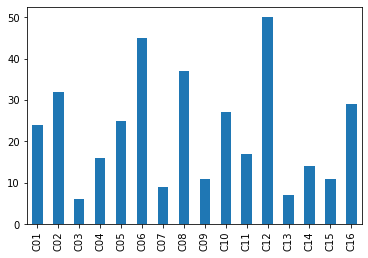

In [20]:
%matplotlib inline
df2.loc['合計'].plot(kind='bar');

In [21]:
from pulp import *
from itertools import product
import math
MEPS = 1.0e-6

In [22]:
n = len(df.index)
m = len(df.columns)
lb = math.floor(n/m)
ub = math.ceil(n/m)

score = {1:100, 2:50, 3:20, 4:0}
ngscore = -100000
prob = LpProblem('ClassAssignment', sense=LpMaximize)
x = {}
p = {}
for i,j in product(df.index, df.columns):
  x[i,j] = LpVariable('x('+str(i)+','+str(j)+')', lowBound=0)
  p[i,j] = score[int(df.loc[i,j])]\
      if df.loc[i,j]>MEPS else ngscore

prob += lpSum(p[i,j]*x[i,j] \
               for i,j in product(df.index, df.columns))

for i in df.index:
  prob += lpSum(x[i,j] for j in df.columns) == 1
for j in df.columns:
  prob += lpSum(x[i,j] for i in df.index) >= lb
  prob += lpSum(x[i,j] for i in df.index) <= ub

prob.solve()

print(LpStatus[prob.status])
print('学生の満足度の総計は' , int(value(prob.objective)))
print('学生一人あたりの平均満足度は', int(value(prob.objective))/90.0)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sasa./miniforge3/envs/py38/lib/python3.8/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/f1/dg38sdvs7tsgxf3hbspgk1vc0000gn/T/134884b1be8545f0a8935b591f20d116-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/f1/dg38sdvs7tsgxf3hbspgk1vc0000gn/T/134884b1be8545f0a8935b591f20d116-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 127 COLUMNS
At line 5798 RHS
At line 5921 BOUNDS
At line 5922 ENDATA
Problem MODEL has 122 rows, 1440 columns and 4320 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 122 (0) rows, 1440 (0) columns and 4320 (0) elements
Perturbing problem by 0.001% of 100000 - largest nonzero change 0.79884133 ( 0.49251135%) - largest zero change 0.099541806
0  Obj -0 Primal inf 169.99999 (106) Dual inf 15279.497 (270)
0  Obj -0 Primal inf 169.99999 (106) D

In [23]:
dfr = df.copy()
for i,j in product(dfr.index, dfr.columns):
  dfr.loc[i,j] = df.loc[i,j] if x[i,j].varValue > MEPS else 0

d2 = {j: [(dfr.loc[:,j]==1).sum(), (dfr.loc[:,j]==2).sum(),
           (dfr.loc[:,j]==3).sum(), (dfr.loc[:,j]==4).sum(),
           (dfr.loc[:,j]>0).sum(),
           sum([p[i,j] for i in df.index
                if x[i,j].varValue > MEPS])] for j in dfr.columns}

df3 = pd.DataFrame(d2, index=['第１希望','第２希望','第３希望','第４希望','合計','クラス満足度'])

df3

,C01,C02,C03,C04,C05,C06,C07,C08,C09,C10,C11,C12,C13,C14,C15,C16
第１希望,1,6,1,1,6,6,0,2,4,6,2,6,1,4,0,4
第２希望,3,0,0,2,0,0,3,4,1,0,3,0,1,1,0,2
第３希望,1,0,4,1,0,0,2,0,0,0,1,0,0,1,1,0
第４希望,0,0,0,2,0,0,0,0,0,0,0,0,3,0,4,0
合計,5,6,5,6,6,6,5,6,5,6,6,6,5,6,5,6
クラス満足度,270,600,180,220,600,600,190,400,450,600,370,600,150,470,20,500
